<a href="https://colab.research.google.com/github/jimtak80/AI_EKPA/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#εγκατάσταση πακέτου dataprep
!pip install dataprep

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is still looking at multiple versions of 

In [ ]:
#εισαγωγή βιβλιοθηκών - πακέτων
import numpy as np
import pandas as pd
import seaborn as sns
from dataprep.eda import create_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

In [ ]:
#εισαγωγή του συνόλου δεδομένων
df=pd.read_csv("https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/DarkNet.csv")

In [ ]:
# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Non-Tor", "NonVPN", "VPN", "Tor"]

,Label-1
Non-Tor,30931
NonVPN,22740
VPN,13517
Tor,1392


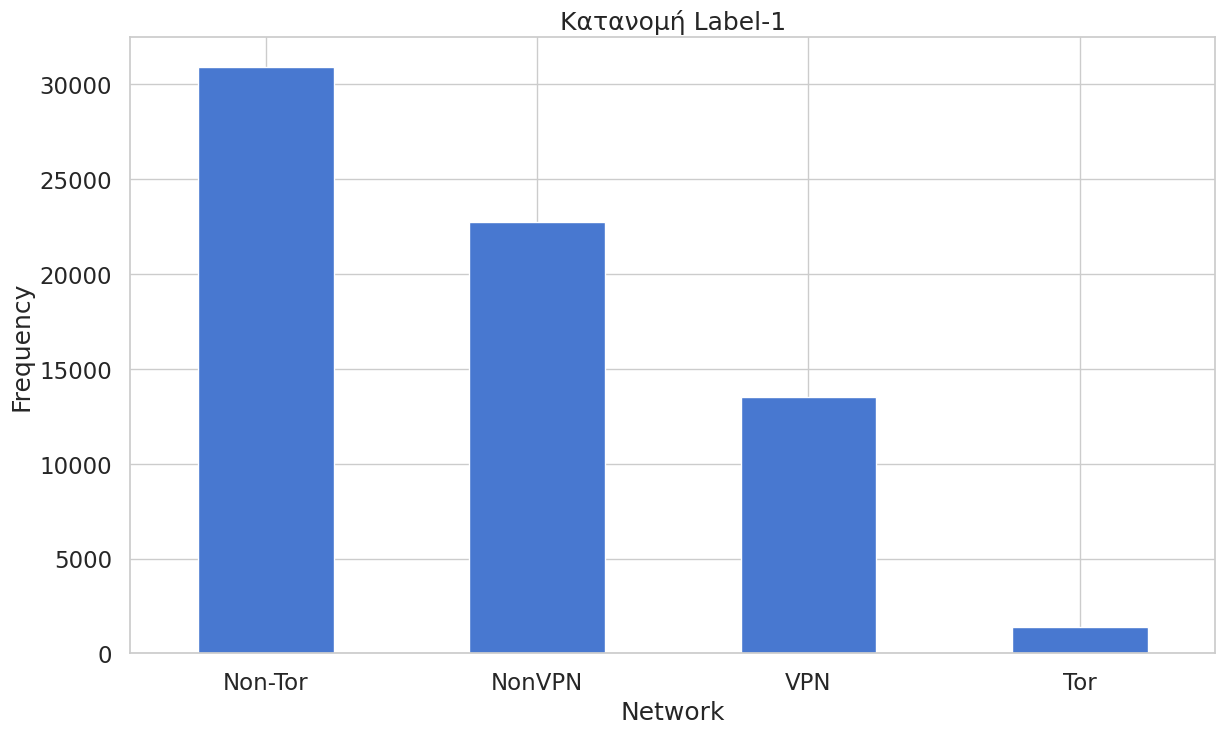

In [ ]:
#tαξινόμηση δεδομένων με βάση το Label-1
#Non-Tor = νόμιμο
#NonVPN = νόμιμο
#Tor = κακόβουλο
#VPN = νόμιμο
count_classes = pd.value_counts(df['Label-1'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Κατανομή Label-1")
plt.xticks(range(4), LABELS)
plt.xlabel("Network")
plt.ylabel("Frequency");
df['Label-1'].value_counts()

In [ ]:
#πληροφορίες του συνόλου δεδομένων
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68580 entries, 0 to 68579
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Src_IP                      68580 non-null  object 
 1   Src_Port                    68580 non-null  int64  
 2   Dst_IP                      68580 non-null  object 
 3   Dst_Port                    68580 non-null  int64  
 4   Protocol                    68580 non-null  int64  
 5   Flow_Duration               68580 non-null  int64  
 6   Total_Fwd_Packet            68580 non-null  int64  
 7   Total_Bwd_packets           68580 non-null  int64  
 8   Total_Length_of_Fwd_Packet  68580 non-null  int64  
 9   Total_Length_of_Bwd_Packet  68580 non-null  int64  
 10  Fwd_Packet_Length_Max       68580 non-null  int64  
 11  Fwd_Packet_Length_Min       68580 non-null  int64  
 12  Fwd_Packet_Length_Mean      68580 non-null  float64
 13  Fwd_Packet_Length_Std       685

In [ ]:
#περιγραφικά στατιστικά συνόλου δεδομένων
df2.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,FWD_Init_Win_Bytes,Bwd_Init_Win_Bytes,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,68580.000000,68580.000000,68580.000000,6.858000e+04,68580.000000,68580.000000,6.858000e+04,6.858000e+04,68580.000000,68580.000000,...,68580.0,68580.000000,68580.000000,68580.000000,68580.000000,68580.000000,6.858000e+04,6.858000e+04,6.858000e+04,6.858000e+04
mean,39726.052041,14235.135200,10.978798,2.405470e+07,291.265777,284.729513,2.286576e+05,2.418586e+05,229.046165,18.948936,...,0.0,62.387416,5899.991718,2513.047157,188.358399,15.521260,6.294694e+14,4.875483e+13,6.540864e+14,5.407995e+14
std,19362.966799,20255.302047,5.577292,4.049607e+07,3399.455076,4873.361494,4.667583e+06,6.522065e+06,846.294647,36.286681,...,0.0,155.992070,12484.549345,10501.259757,2260.533013,8.088541,6.984537e+14,1.820131e+14,7.179893e+14,6.981754e+14
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,32898.000000,80.000000,6.000000,1.225882e+05,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,45126.000000,4644.000000,6.000000,4.201030e+05,2.000000,1.000000,4.400000e+01,0.000000e+00,33.000000,0.000000,...,0.0,0.000000,254.000000,0.000000,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,54712.000000,28326.000000,17.000000,2.716053e+07,5.000000,3.000000,3.360000e+02,2.180000e+02,108.000000,33.000000,...,0.0,70.000000,6064.750000,980.000000,2.000000,20.000000,1.433530e+15,1.807551e+07,1.437150e+15,1.433530e+15
max,65534.000000,65533.000000,17.000000,1.200000e+08,238161.000000,470862.000000,7.693074e+08,6.704287e+08,64240.000000,1350.000000,...,0.0,4872.000000,65535.000000,65535.000000,113325.000000,44.000000,1.460000e+15,1.030000e+15,1.460000e+15,1.460000e+15


In [ ]:
#διερευνητική ανάλυση δεδομένων (Exploratory Data Analysis - EDA)
create_report(df2)

In [ ]:
#διαγραφή των στηλών
df1 = df.drop(['Src_IP', 'Dst_IP', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Flow_Bytes/s', 'URG_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Fwd_Bytes/Bulk_Avg', 'Fwd_Packet/Bulk_Avg',
         'Fwd_Bulk_Rate_Avg', 'Bwd_Bytes/Bulk_Avg', 'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Label-2'], axis = 1, inplace = True)

In [ ]:
# διαγραφή χαρακτηριστικών τύπου float64
df3 = df2.select_dtypes(include=['int64','object']).dropna()
df3.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,FWD_Init_Win_Bytes,Bwd_Init_Win_Bytes,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Idle_Mean,Idle_Max,Idle_Min
count,68580.000000,68580.000000,68580.000000,6.858000e+04,68580.000000,68580.000000,6.858000e+04,6.858000e+04,68580.000000,68580.000000,...,68580.000000,68580.0,68580.000000,68580.000000,68580.000000,68580.000000,68580.000000,6.858000e+04,6.858000e+04,6.858000e+04
mean,39726.052041,14235.135200,10.978798,2.405470e+07,291.265777,284.729513,2.286576e+05,2.418586e+05,229.046165,18.948936,...,60.712555,0.0,62.387416,5899.991718,2513.047157,188.358399,15.521260,6.294694e+14,6.540864e+14,5.407995e+14
std,19362.966799,20255.302047,5.577292,4.049607e+07,3399.455076,4873.361494,4.667583e+06,6.522065e+06,846.294647,36.286681,...,189.043032,0.0,155.992070,12484.549345,10501.259757,2260.533013,8.088541,6.984537e+14,7.179893e+14,6.981754e+14
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,32898.000000,80.000000,6.000000,1.225882e+05,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,45126.000000,4644.000000,6.000000,4.201030e+05,2.000000,1.000000,4.400000e+01,0.000000e+00,33.000000,0.000000,...,18.000000,0.0,0.000000,254.000000,0.000000,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,54712.000000,28326.000000,17.000000,2.716053e+07,5.000000,3.000000,3.360000e+02,2.180000e+02,108.000000,33.000000,...,27.000000,0.0,70.000000,6064.750000,980.000000,2.000000,20.000000,1.433530e+15,1.437150e+15,1.433530e+15
max,65534.000000,65533.000000,17.000000,1.200000e+08,238161.000000,470862.000000,7.693074e+08,6.704287e+08,64240.000000,1350.000000,...,6644.000000,0.0,4872.000000,65535.000000,65535.000000,113325.000000,44.000000,1.460000e+15,1.460000e+15,1.460000e+15


In [ ]:
#ανακάτεμα και οπτικοποίηση του συνόλου δεδομένων
df2 = df.sample(frac = 1).reset_index(drop = True)
df2.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Subflow_Bwd_Bytes,FWD_Init_Win_Bytes,Bwd_Init_Win_Bytes,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label-1
0,38206,443,6,20,2,0,53,0,53,0,...,0,303,0,0,32,0,0.000000e+00,0,0,VPN
1,50624,13000,6,55400,8,12,1428,5827,506,0,...,291,65535,32235,4,20,1430490000000000,1.087833e+04,1430490000000000,1430490000000000,NonVPN
2,17500,17500,17,90267051,4,0,456,0,114,114,...,0,0,0,3,8,955049000000000,8.270970e+14,1432570000000000,30063334,NonVPN
3,31773,443,6,119827755,5,3,24,0,6,0,...,0,16384,16384,4,20,1225990000000000,5.406120e+14,1430330000000000,29837856,NonVPN
4,44949,443,6,5485821,18,20,5328,10906,1460,0,...,287,14600,1710,6,20,1456340000000000,1.206109e+06,1456340000000000,1456340000000000,Non-Tor


In [ ]:
#διαχωρισμός και εκχώρηση ανεξάρτητων μεταβλητών σε X και μεταβλητών στόχων σε y
y = df3['Label-1']
x = df3.drop('Label-1', axis=1)
x.shape, y.shape

((68580, 44), (68580,))

In [ ]:
#τμηματοποίηση συνόλου σε δεδομένα εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Ορίζουμε ένα LabelEncoder για κάθε στήλη με συμβολοσειρές
label_encoders = {}
for column in df3.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    df3[column] = label_encoders[column].fit_transform(df3[column])

In [ ]:
# Δημιουργία του OneClassSVM με προεπιλεγμένες ρυθμίσεις για τον εντοπισμό ακραίων τιμών
outlier_detector = OneClassSVM(nu=0.05)
outliers = outlier_detector.fit_predict(df3)

In [ ]:
# Επαναφορά των αρχικών τιμών συμβολοσειρών αν χρειαστεί
for column in df3.select_dtypes(include='object').columns:
    df3[column] = label_encoders[column].inverse_transform(df3[column])

In [ ]:
# Εκτύπωση των ακραίων τιμών
print("Ακραίες Τιμές:\n", outliers)

Ακραίες Τιμές:
 [ 1 -1 -1 ... -1 -1 -1]


In [ ]:
# Δημιουργία νέου συνόλου δεδομένων μετά την αφαίρεση των ακραίων τιμών
clean_data = pd.DataFrame(df3[outliers != -1])
clean_data['Label-1'] = y[outliers != -1]

In [ ]:
# Αναφορά του νέου συνόλου ανά κλάση
remaining_instances_report = clean_data['Label-1'].value_counts()
print("Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:\n", remaining_instances_report)

Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:
 Non-Tor    17395
NonVPN      6654
VPN         3987
Tor         1115
Name: Label-1, dtype: int64


In [ ]:
# Εκτύπωση καθαρού συνόλου
clean_data

,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,FWD_Init_Win_Bytes,Bwd_Init_Win_Bytes,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Idle_Mean,Idle_Max,Idle_Min,Label-1
0,52327,443,17,4000376,6,0,6793,0,1350,43,...,0,0,0,0,5,8,1437770000000000,1437770000000000,1437770000000000,Non-Tor
4,9100,57414,17,9750839,3,0,60,0,20,20,...,0,0,0,0,2,8,1456320000000000,1456320000000000,1456320000000000,Non-Tor
7,60502,51413,6,93872182,20,20,2804,1039,1410,0,...,0,25,14600,1515,15,20,1456320000000000,1456320000000000,1456320000000000,Non-Tor
9,59825,32001,6,102492396,7,5,693,178,351,0,...,0,14,1278,1825,3,20,1456320000000000,1456320000000000,1456320000000000,Non-Tor
12,49496,9100,6,5671,3,3,68,0,68,0,...,0,0,14600,913,1,20,1456260000000000,1456260000000000,1456260000000000,Non-Tor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68559,51128,80,6,61670811,11,11,1089,1163,1089,0,...,0,52,14600,1049,1,20,1456340000000000,1456340000000000,1456340000000000,Non-Tor
68561,60391,32094,6,1521747,11,7,200,170,108,0,...,0,9,29200,260,4,32,1433510000000000,1433510000000000,1433510000000000,VPN
68565,38431,443,6,89433309,3,4,0,31,0,0,...,0,4,371,39,0,32,1432490000000000,1432490000000000,1432490000000000,VPN
68572,37938,58698,6,62808730,482,287,245621,177,1308,0,...,0,0,29200,260,476,32,1433510000000000,1433510000000000,1433510000000000,VPN


In [ ]:
#τμηματοποίηση συνόλου σε δεδομένα εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop('Label-1', axis=1), clean_data['Label-1'], test_size=0.2, random_state=42)

In [ ]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#σύγκριση αλγορίθμων: RandomForest, GradientBoosting, AdaBoost
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}
ranking_table_comparison = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

In [ ]:
#αξιολόγηση μοντέλων
for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    #αξιολόγηση στο σύνολο δοκιμών
    y_pred = pipeline.fit(X_train_scaled, y_train).predict(X_test_scaled)

    #υπολογισμών μετρικών αξιολόγησης
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average = None)
    precision = precision_score(y_test, y_pred, average = None)
    f1 = f1_score(y_test, y_pred, average = None)

    #κατάταξη αποτελεσμάτων αξιολόγησης
    ranking_table_comparison.loc[model_name] = [accuracy, recall, precision, f1]

    #αποτελέσματα αξιολόγησης
    print(f"{model_name} - Αποτελέσματα Κατηγοριοποίησης:\n", classification_report(y_test, y_pred))
    print(f"{model_name} - Πίνακας Συγχυσης:\n", confusion_matrix(y_test, y_pred))
    print()

RandomForest - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

     Non-Tor       1.00      1.00      1.00      3399
      NonVPN       0.99      1.00      1.00      1361
         Tor       1.00      0.97      0.98       238
         VPN       1.00      1.00      1.00       833

    accuracy                           1.00      5831
   macro avg       1.00      0.99      0.99      5831
weighted avg       1.00      1.00      1.00      5831

RandomForest - Πίνακας Συγχυσης:
 [[3399    0    0    0]
 [   0 1359    0    2]
 [   0    8  230    0]
 [   0    2    0  831]]

GradientBoosting - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

     Non-Tor       1.00      1.00      1.00      3399
      NonVPN       1.00      1.00      1.00      1361
         Tor       1.00      1.00      1.00       238
         VPN       1.00      1.00      1.00       833

    accuracy                           1.00      5831
   macro avg 

In [ ]:
#αποτύπωση αποτελεσμάτων αξιολόγησης
print("Κατάταξη Αποτελεσμάτων:")
print(ranking_table_comparison)

Κατάταξη Αποτελεσμάτων:
                  Accuracy                                             Recall  \
RandomForest      0.997942  [1.0, 0.9985304922850845, 0.9663865546218487, ...   
GradientBoosting  0.999486  [1.0, 1.0, 0.9957983193277311, 0.9975990396158...   
AdaBoost          0.811868  [0.9655781112091791, 0.9368111682586333, 0.033...   

                                                          Precision  \
RandomForest      [1.0, 0.9926953981008035, 1.0, 0.9975990396158...   
GradientBoosting                [1.0, 0.9978005865102639, 1.0, 1.0]   
AdaBoost          [0.9393245563823698, 0.6515074092999489, 0.04,...   

                                                           F1 Score  
RandomForest      [1.0, 0.9956043956043956, 0.9829059829059829, ...  
GradientBoosting  [1.0, 0.9988990825688073, 0.9978947368421053, ...  
AdaBoost          [0.9522704192659219, 0.7685352622061483, 0.036...  
